# Prosper Loan Analysis
## by Xinqi Lin

## Investigation Overview

> In this project, I will conduct analysis on Prosper Loan Data. I will pick some of the variables that are related to Default to analyze. I will first do some data wrangling and cleaning, and then move on to EDA using different types of charts to explore relationships between/among variables, and hopefully find out which variables are most correlated with Default.

## Dataset Overview

> The dataset of Prosper Loan contains 113,937 rows and 81 columns. Most variables are numeric, some are categorical, boolean and date. Variables like ProsperRating (Alpha) and IncomeRange can be ordered factor variables with the following levels.
Some of the variables have a lot of null values, such as variables prosperrating and prosperscore, which I'll need to deal with. Some variables are not of much use, such as listingkey, listingnumber, of other identifiers, which I did not include in my analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv("prosperLoanData.csv")

In [3]:
# Cleaning
loan_clean = loan.copy()
loan_clean.columns = map(str.lower, loan_clean.columns)
loan_clean.columns = loan_clean.columns.str.replace(' ', '_')
# Remove columns I absolutely don't need for my analysis.
loan_clean.drop(columns = ['listingkey', 'listingnumber', 'groupkey', 'loankey', 'loannumber', 'memberkey', 'closeddate'], inplace = True)
# Deal with categorical variables' null values.
categorical_columns = loan_clean.select_dtypes(include = 'object').columns
loan_clean[categorical_columns] = loan_clean[categorical_columns].fillna('unknown')
loan_clean.drop(columns = ['borrowerapr','estimatedeffectiveyield', 'estimatedloss', 'estimatedreturn', \
                           'prosperrating_(numeric)', 'prosperscore'], inplace = True)
loan_clean.dropna(subset = ['employmentstatusduration', 'creditscorerangelower', 'creditscorerangeupper', \
                            'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years', 'currentdelinquencies', \
                            'amountdelinquent', 'delinquencieslast7years'], inplace = True)
loan_clean['debttoincomeratio'].fillna(loan_clean['monthlyloanpayment'] / loan_clean['statedmonthlyincome'], inplace = True)
loan_clean['debttoincomeratio'].replace(np.inf, np.nan, inplace = True)
loan_clean['debttoincomeratio'].fillna(loan_clean['monthlyloanpayment'] / (loan_clean['statedmonthlyincome'] + 1), inplace = True)
columns = ['totalprosperloans', 'totalprosperpaymentsbilled', 'ontimeprosperpayments', 'prosperpaymentslessthanonemonthlate',\
            'prosperpaymentsonemonthpluslate', 'prosperprincipalborrowed', 'prosperprincipaloutstanding']
for col in columns:
    loan_clean[col].fillna(0, inplace = True)
loan_clean.drop(columns = ['scorexchangeattimeoflisting', 'loanfirstdefaultedcyclenumber', 'lp_customerpayments',\
                          'lp_customerprincipalpayments', 'lp_interestandfees', 'lp_servicefees', 'lp_collectionfees',\
                          'lp_grossprincipalloss', 'lp_netprincipalloss', 'lp_nonprincipalrecoverypayments'], inplace = True)

In [4]:
loan_analysis = loan_clean[loan_clean['loanstatus'].isin(['Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', \
                                                          'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)'\
                                                         'Past Due (16-30 days)', 'Past Due (>120 days)'])]
loan_analysis['default'] = np.where(loan_analysis['loanstatus'] == 'Completed', 0, 1)

## Default Loans Percentage

> I created a new variable called **Default** based on the priginal variable loanstatus. 1 represents the loan is default, and 0 means the loan has been completed.

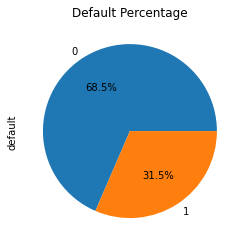

In [5]:
loan_analysis['default'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');
plt.title('Default Percentage');

## Borrower Rate by Default

> Borrower rate is the borrower's interest rate for this loan. From the plot, we see that withloans that are default, borrower rate are more likely to be higher.

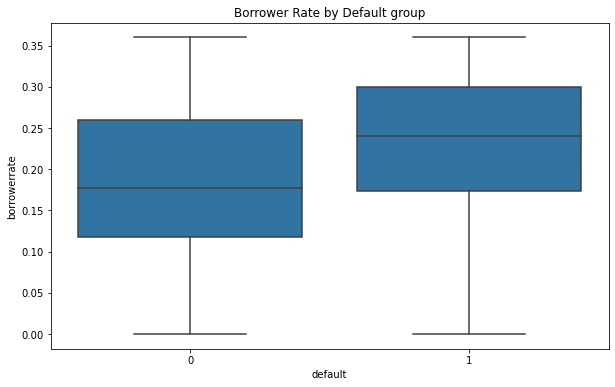

In [6]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (10, 6))
sb.boxplot(data = loan_analysis, x = 'default', y = 'borrowerrate', color = base_color);
plt.title('Borrower Rate by Default group');

## Default Rate by Income Group

The highest default rate come from *Not Employed group* and *\\$0* group, which makes sense because people who are not employed and not having income might lead to their financial crisis, which could increase the possibility of not being able to pay the loan. But then, *Not display* group's average default rate is lower than \\$0 - \\$49,999, which makes me wonder maybe that group actually has income.

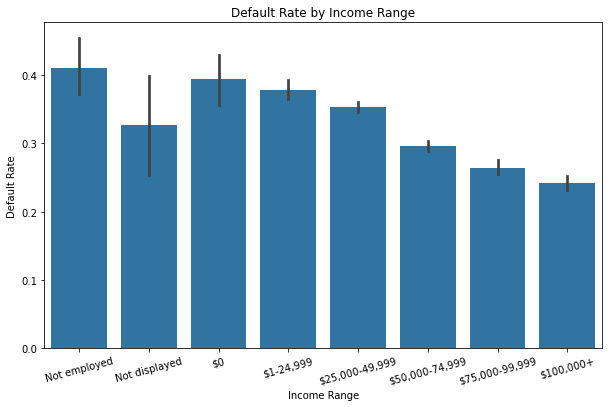

In [7]:
income_classes = ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
loan_analysis['incomerange'] = pd.Categorical(loan_analysis['incomerange'], categories = income_classes, ordered = True)
plt.figure(figsize = (10, 6))
sb.barplot(data = loan_analysis, x = 'incomerange', y = 'default', color = base_color);
plt.xticks(rotation = 15);
plt.xlabel('Income Range');
plt.ylabel('Default Rate');
plt.title('Default Rate by Income Range');

## Borrower Rate by Credit Score Range Lower & Default
There's a strong negative correlation between credit scroe lower range and default rate. However, credit score 860 looks a bit strange. And for each credit score, we see that the borrower rate for default group are more likely to be higher.

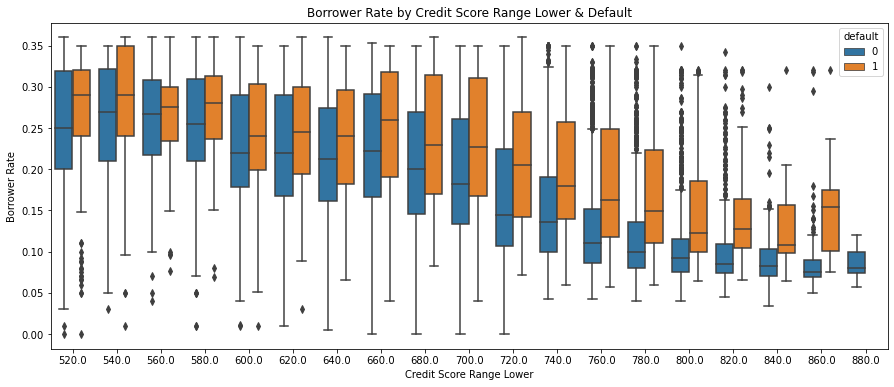

In [8]:
plt.figure(figsize = (15, 6))
sb.boxplot(data = loan_analysis, x = 'creditscorerangelower', y = 'borrowerrate', hue = 'default');
plt.xlabel('Credit Score Range Lower');
plt.ylabel('Borrower Rate');
plt.title('Borrower Rate by Credit Score Range Lower & Default');

In [ ]:
!jupyter nbconvert Prosper_Loan_Analysis_Slide.ipynb --to slides --post serve --no-input --no-prompt